# Introduction

The National Longitudinal Survey of Youth 1997-2011 dataset is one of the most important databases available to social scientists working with US data. 

It allows scientists to look at the determinants of earnings as well as educational attainment and has incredible relevance for government policy. It can also shed light on politically sensitive issues like how different educational attainment and salaries are for people of different ethnicity, sex, and other factors. When we have a better understanding how these variables affect education and earnings we can also formulate more suitable government policies. 

<center><img src=https://i.imgur.com/cxBpQ3I.png height=400></center>


### Upgrade Plotly

In [1]:
%pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.2 MB 13.5 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


###  Import Statements


In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

# Load the Data



In [4]:
df_data = pd.read_csv('NLSY97_subset.csv')

### Understand the Dataset

Have a look at the file entitled `NLSY97_Variable_Names_and_Descriptions.csv`. 

---------------------------

    :Key Variables:  
      1. S           Years of schooling (highest grade completed as of 2011)
      2. EXP         Total out-of-school work experience (years) as of the 2011 interview.
      3. EARNINGS    Current hourly earnings in $ reported at the 2011 interview

# Preliminary Data Exploration 🔎

**Challenge**

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [5]:
df_data.shape

(2000, 96)

## Data Cleaning - Check for Missing Values and Duplicates

Find and remove any duplicate rows.

In [14]:
df_data.isna().values.any()

False

In [15]:
df_data.duplicated().values.any()

False

In [12]:
df_data = df_data.fillna(0)

In [13]:
df_data = df_data.drop_duplicates()

## Descriptive Statistics

In [16]:
df_data.columns

Index(['ID', 'EARNINGS', 'S', 'EXP', 'FEMALE', 'MALE', 'BYEAR', 'AGE',
       'AGEMBTH', 'HHINC97', 'POVRAT97', 'HHBMBF', 'HHBMOF', 'HHOMBF',
       'HHBMONLY', 'HHBFONLY', 'HHOTHER', 'MSA97NO', 'MSA97NCC', 'MSA97CC',
       'MSA97NK', 'ETHBLACK', 'ETHHISP', 'ETHWHITE', 'EDUCPROF', 'EDUCPHD',
       'EDUCMAST', 'EDUCBA', 'EDUCAA', 'EDUCHSD', 'EDUCGED', 'EDUCDO',
       'PRMONM', 'PRMONF', 'PRMSTYUN', 'PRMSTYPE', 'PRMSTYAN', 'PRMSTYAE',
       'PRFSTYUN', 'PRFSTYPE', 'PRFSTYAN', 'PRFSTYAE', 'SINGLE', 'MARRIED',
       'COHABIT', 'OTHSING', 'FAITHN', 'FAITHP', 'FAITHC', 'FAITHJ', 'FAITHO',
       'FAITHM', 'ASVABAR', 'ASVABWK', 'ASVABPC', 'ASVABMK', 'ASVABNO',
       'ASVABCS', 'ASVABC', 'ASVABC4', 'VERBAL', 'ASVABMV', 'HEIGHT',
       'WEIGHT04', 'WEIGHT11', 'SF', 'SM', 'SFR', 'SMR', 'SIBLINGS', 'REG97NE',
       'REG97NC', 'REG97S', 'REG97W', 'RS97RURL', 'RS97URBN', 'RS97UNKN',
       'JOBS', 'HOURS', 'TENURE', 'CATGOV', 'CATPRI', 'CATNPO', 'CATMIS',
       'CATSE', 'COLLBARG', 'URBAN'

## Visualise the Features

In [17]:
df_data.describe()

,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
count,"1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00",...,"1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00"
mean,"3,547.13",18.81,14.56,6.70,0.49,0.51,"1,982.07",28.93,25.72,"47,252.43",...,0.78,0.16,0.27,0.34,0.23,0.05,0.54,0.41,0.00,0.00
std,"2,009.84",12.00,2.77,2.86,0.50,0.50,1.38,1.38,6.38,"45,629.92",...,0.43,0.36,0.44,0.47,0.42,0.21,0.50,0.49,0.04,0.00
min,1.00,2.00,6.00,0.00,0.00,0.00,"1,980.00",27.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"1,888.00",11.41,12.00,4.65,0.00,0.00,"1,981.00",28.00,22.00,"13,740.50",...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,"3,474.00",15.75,15.00,6.63,0.00,1.00,"1,982.00",29.00,26.00,"41,840.00",...,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
75%,"5,160.50",22.60,16.00,8.71,1.00,1.00,"1,983.00",30.00,30.00,"66,400.00",...,1.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00
max,"8,980.00",132.89,20.00,14.73,1.00,1.00,"1,984.00",31.00,45.00,"246,474.00",...,2.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00


# Split Training & Test Dataset

We *can't* use all the entries in our dataset to train our model. Keep 20% of the data for later as a testing dataset (out-of-sample data).  

In [18]:
target = df_data['EARNINGS']  # this is the target variable, earnings
features = df_data.drop('EARNINGS', axis=1)  # to get all the other variables, we remove the earning column and now it represents our features

In [19]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=10, test_size=0.2)  # 0.2 = 20%

# Linear Regression with the Whole Dataset

Use sklearn to run the regression on the training dataset. How high is the r-squared for the regression on the training data?

In [20]:
regression = LinearRegression()

In [21]:
regression.fit(X_train, y_train)

LinearRegression()

In [22]:
print(f"R-squared: {regression.score(X_train, y_train):.2}")

R-squared: 0.31


0.31 for R-squared is not very good, but it could be worse. Over 0.5 is considered good.

### Evaluate the Coefficients of the Model

Here we do a sense check on our regression coefficients. The first thing to look for is if the coefficients have the expected sign (positive or negative). 

Interpret the regression. How many extra dollars can one expect to earn for an additional year of schooling?

In [79]:
regr_coef = pd.DataFrame(data=regression.coef_, index=X_train.columns, columns=['Coefficient'])
regr_coef

,Coefficient
ID,-0.00
S,1.19
EXP,0.90
FEMALE,-75.43
MALE,-73.46
...,...
MSA11NO,-4.77
MSA11NCC,-4.48
MSA11CC,-3.63
MSA11NK,2.05


In [27]:
round(regr_coef.loc['S'].values[0], 2)  # values[0] gives the coefficient, answer given is $/hr

1.19

According to the above line of code, we can expect someone to earn $1.19/hour extra for each additional year of schooling.

### Analyse the Estimated Values & Regression Residuals

How good our regression is also depends on the residuals - the difference between the model's predictions ( 𝑦̂ 𝑖 ) and the true values ( 𝑦𝑖 ) inside y_train. Do you see any patterns in the distribution of the residuals? Check for skewness and mean as well.

In [60]:
predicted_values = regression.predict(X_train)
residuals = (y_train - predicted_values)

In [61]:
residuals.shape  # very long data

(1189,)

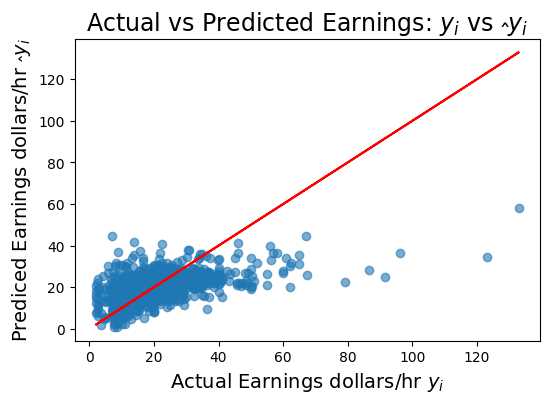

In [62]:
# Original Regression of Actual vs. Predicted Earnings
plt.figure(dpi=100)
plt.scatter(x=y_train, y=predicted_values, alpha=0.6)
plt.plot(y_train, y_train, color='red')  # identity line, plotting the same variable against itself is equal to x=y
plt.title(f'Actual vs Predicted Earnings: $y _i$ vs $\hat y_i$', fontsize=17)
plt.xlabel('Actual Earnings dollars/hr $y _i$', fontsize=14)
plt.ylabel('Prediced Earnings dollars/hr $\hat y _i$', fontsize=14)
plt.show()

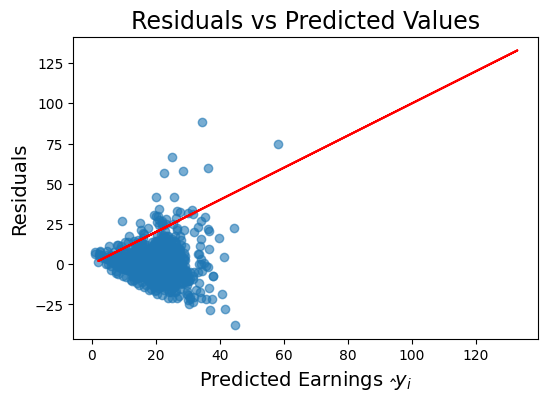

In [63]:
# Residuals vs Predicted values
plt.figure(dpi=100)
plt.scatter(x=predicted_values, y=residuals, alpha=0.6)
plt.plot(y_train, y_train, color='red')  # identity line
plt.title('Residuals vs Predicted Values', fontsize=17)
plt.xlabel('Predicted Earnings $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

We want to look at the randomness of the residual graph and if the points form an approximately constant width band around the identity line.

Looking at this one, we can deduce:

- There is no linear pattern formed by the points, so the model most likely has no systemic bias.
- The width band is declining (heavier at the bottom of the identity line), which points to the variance not being constant. This isn't a surprise as R-squared is 0.31
- Normality is only an issue with small sample sizes, however we have many points of data here.
- The points do not seem to be independant, due to the cone shape of the spread, so we can assume there is autocorrelation.


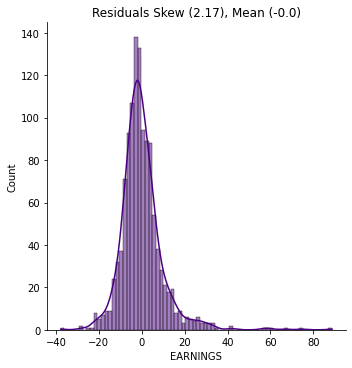

In [40]:
# Residual Distribution Chart
residual_mean = round(residuals.mean(), 2)
residual_skew = round(residuals.skew(), 2)

sns.displot(residuals, kde=True, color='indigo')
plt.title(f'Residuals Skew ({residual_skew}), Mean ({residual_mean})')
plt.show()

Mean of 0 is perfect, that is the ideal.
However, the skew is not 0, this means the data is biased to one side, very slightly in this case, by 2 to the right.

# Simple Linear Regression

Only use the years of schooling to predict earnings. Use sklearn to run the regression on the training dataset. How high is the r-squared for the regression on the training data? 

In [41]:
target2 = df_data['EARNINGS']  # this is the target variable, earnings (response variable)
features2 = df_data['S']  # use years of education as the feature variable (predictor variable)

In [42]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(features, target, random_state=10, test_size=0.2)  # 0.2 = 20%

In [47]:
X_train2 = X_train2.array.reshape(-1, 1)  # we need to do this since our data only has a single feature, since linear regression expects a 2D array
X_test2 = X_test2.array.reshape(-1, 1)
y_train2 = y_train2.array.reshape(-1, 1)
y_test2 = y_test2.array.reshape(-1, 1)

In [43]:
regression2 = LinearRegression()

In [48]:
regression2.fit(X_train2, y_train2)

LinearRegression()

In [49]:
print(f"R-squared: {regression2.score(X_train2, y_train2):.2}")

R-squared: 0.081


This is a very bad value for r squared.

Evaluate the Coefficients of the Model
Here we do a sense check on our regression coefficients. The first thing to look for is if the coefficients have the expected sign (positive or negative).

Interpret the regression. How many extra dollars can one expect to earn for an additional year of schooling?

In [55]:
round(regression2.coef_[0][0], 2)  # [0][0] since it is 1 value in the array, this is the coef for S

1.22

This means for every extra year of schooling, one can expect to earn 1.22 $/hr more.

Analyse the Estimated Values & Regression Residuals
How good our regression is also depends on the residuals - the difference between the model's predictions ( 𝑦̂ 𝑖 ) and the true values ( 𝑦𝑖 ) inside y_train. Do you see any patterns in the distribution of the residuals? Check for skewness and mean as well.

In [81]:
predicted_values2 = regression2.predict(X_train2)
residuals2 = (y_train2 - predicted_values2)

In [82]:
residuals2.shape  # very long data

(1189, 1)

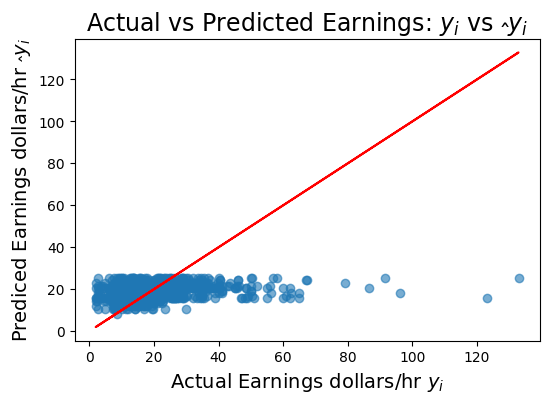

In [83]:
# Original Regression of Actual vs. Predicted Earnings
plt.figure(dpi=100)
plt.scatter(x=y_train2, y=predicted_values2, alpha=0.6)
plt.plot(y_train2, y_train2, color='red')  # identity line
plt.title(f'Actual vs Predicted Earnings: $y _i$ vs $\hat y_i$', fontsize=17)
plt.xlabel('Actual Earnings dollars/hr $y _i$', fontsize=14)
plt.ylabel('Prediced Earnings dollars/hr $\hat y _i$', fontsize=14)
plt.show()

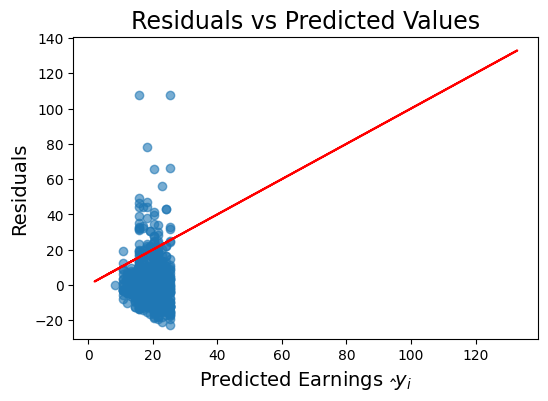

In [84]:
# Residuals vs Predicted values
plt.figure(dpi=100)
plt.scatter(x=predicted_values2, y=residuals2, alpha=0.6)
plt.plot(y_train2, y_train2, color='red')  # identity line
plt.title('Residuals vs Predicted Values', fontsize=17)
plt.xlabel('Predicted Earnings $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

The same analysis as the previous residual chart applies except, there is a linear upwards trend here which shows a clear systemic bias in the prediction model.

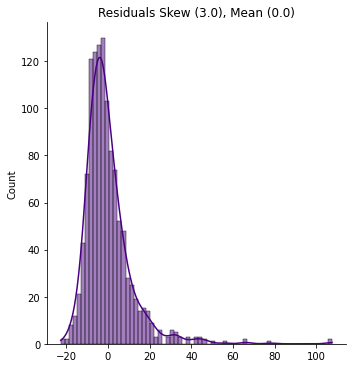

In [67]:
# Residual Distribution Chart
residual_mean2 = round(residuals2.mean(), 2)
residual_skew2 = round(residuals2.skew(), 2)

sns.displot(residuals2.reshape(-1), kde=True, color='indigo')  # reshape needed since displot needs 1D array if it is 1,1 data
plt.title(f'Residuals Skew ({residual_skew2}), Mean ({residual_mean2})')
plt.show()

The mean is 0 which is ideal, however, the skew is even worse than compared to using all the variables in the dataset.

# Multivariable Regression

Now use both years of schooling and the years work experience to predict earnings. How high is the r-squared for the regression on the training data? 

In [73]:
target3 = df_data['EARNINGS']  # this is the target variable, earnings (response variable)
features3 = df_data[['S', 'EXP']]  # use years of education and work experience as the feature variable (predictor variable)

In [74]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(features, target, random_state=10, test_size=0.2)  # 0.2 = 20%

In [75]:
regression3 = LinearRegression()

In [76]:
regression3.fit(X_train3, y_train3)

LinearRegression()

In [77]:
print(f"R-squared: {regression3.score(X_train3, y_train3):.2}")

R-squared: 0.12


Slightly better than single variable but still quite bad.

### Evaluate the Coefficients of the Model

In [80]:
regr_coef3 = pd.DataFrame(data=regression3.coef_, index=X_train3.columns, columns=['Coefficient'])
regr_coef3

,Coefficient
S,1.79
EXP,0.98


The increase for each additional year of school is dramatically larger than the single and full variable regressions, at 1.79 compared to 1.22 and 1.19 respectively. However, weirdly enough, more work experience correlates to a smaller increase, but an increase nonetheless in hourly wage.

### Analyse the Estimated Values & Regression Residuals

In [85]:
predicted_values3 = regression3.predict(X_train3)
residuals3 = (y_train3 - predicted_values3)

In [86]:
residuals3.shape  # very long data

(1189,)

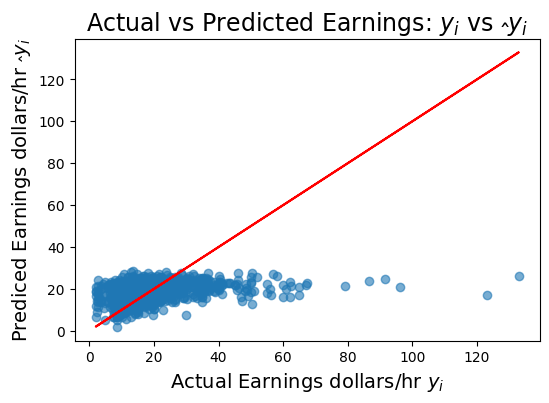

In [87]:
# Original Regression of Actual vs. Predicted Earnings
plt.figure(dpi=100)
plt.scatter(x=y_train3, y=predicted_values3, alpha=0.6)
plt.plot(y_train3, y_train3, color='red')  # identity line
plt.title(f'Actual vs Predicted Earnings: $y _i$ vs $\hat y_i$', fontsize=17)
plt.xlabel('Actual Earnings dollars/hr $y _i$', fontsize=14)
plt.ylabel('Prediced Earnings dollars/hr $\hat y _i$', fontsize=14)
plt.show()

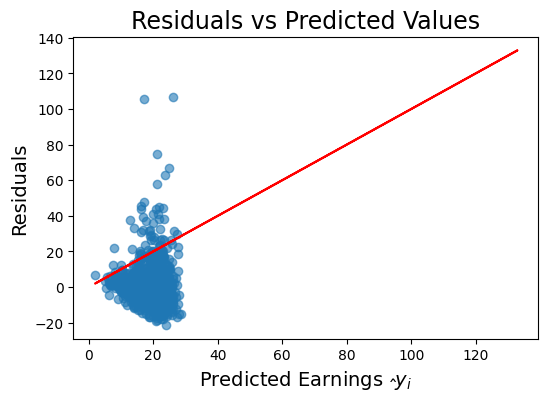

In [88]:
# Residuals vs Predicted values
plt.figure(dpi=100)
plt.scatter(x=predicted_values3, y=residuals3, alpha=0.6)
plt.plot(y_train3, y_train3, color='red')  # identity line
plt.title('Residuals vs Predicted Values', fontsize=17)
plt.xlabel('Predicted Earnings $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

Everything from the single variable residual plot applies to this one, but this one is very slightly better.

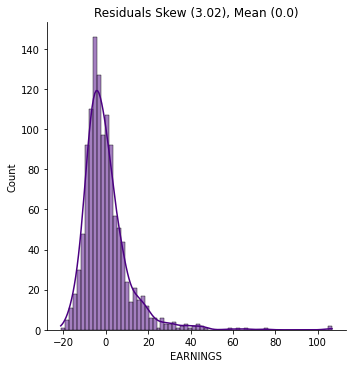

In [90]:
# Residual Distribution Chart
residual_mean3 = round(residuals3.mean(), 2)
residual_skew3 = round(residuals3.skew(), 2)

sns.displot(residuals3, kde=True, color='indigo')
plt.title(f'Residuals Skew ({residual_skew3}), Mean ({residual_mean3})')
plt.show()

Mean is still 0, but somehow the skew has gotten even worse with the multivariable regression.

# Use Your Model to Make a Prediction

How much can someone with a bachelors degree (12 + 4) years of schooling and 5 years work experience expect to earn in 2011?

In [111]:
# using multivariable (with 2 features) regression model
# [[S, EXP]], alternatively use dataframe to predict, no point in making one for 2 variables tho

prediction = regression3.predict([[16, 5]])[0]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [113]:
print(f"${prediction:.4}/hour")

$19.71/hour


Quite low. :(